In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC
#Reading data and loading data

path = '/content/default 2.xls'
df = pd.read_excel(path)
df

,A,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#Showing information and whether data exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       30001 non-null  object
 1   X1      30001 non-null  object
 2   X2      30001 non-null  object
 3   X3      30001 non-null  object
 4   X4      30001 non-null  object
 5   X5      30001 non-null  object
 6   X6      30001 non-null  object
 7   X7      30001 non-null  object
 8   X8      30001 non-null  object
 9   X9      30001 non-null  object
 10  X10     30001 non-null  object
 11  X11     30001 non-null  object
 12  X12     30001 non-null  object
 13  X13     30001 non-null  object
 14  X14     30001 non-null  object
 15  X15     30001 non-null  object
 16  X16     30001 non-null  object
 17  X17     30001 non-null  object
 18  X18     30001 non-null  object
 19  X19     30001 non-null  object
 20  X20     30001 non-null  object
 21  X21     30001 non-null  object
 22  X22     30001 non-null

In [ ]:
#Check for null values if values null then use min/max/average/mean formulas to fill
df.isnull().sum()

A      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [ ]:
#Describe the data
df.describe()

,A,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


<Axes: xlabel='Y', ylabel='count'>

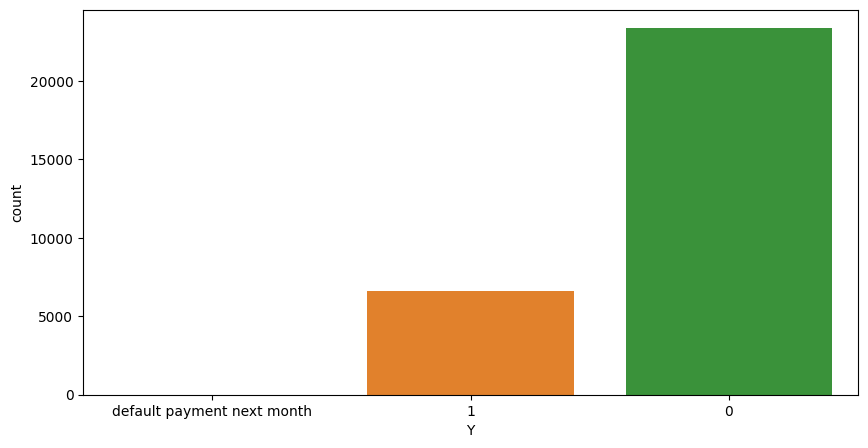

In [ ]:
#Create a graph to check for default payment next month
plt.figure(figsize=(10,5))
sns.countplot(x = 'Y', data = df)

In [ ]:
df['Y'].value_counts()

0                             23364
1                              6636
default payment next month        1
Name: Y, dtype: int64

In [ ]:
#Do a categorical features check
df['X2'].value_counts()
df['X3'].value_counts()
fil = (df['X3'] == 5) | (df['X3'] == 6) | (df['X3'] == 0)
df.loc[fil, 'X3'] = 4
df['X3'].value_counts()
df['X4'].value_counts()
fil = df['X4'] == 0
df.loc[fil, 'X4'] = 3
df['X4'].value_counts()


2           15964
1           13659
3             377
MARRIAGE        1
Name: X4, dtype: int64

<Figure size 1000x500 with 0 Axes>

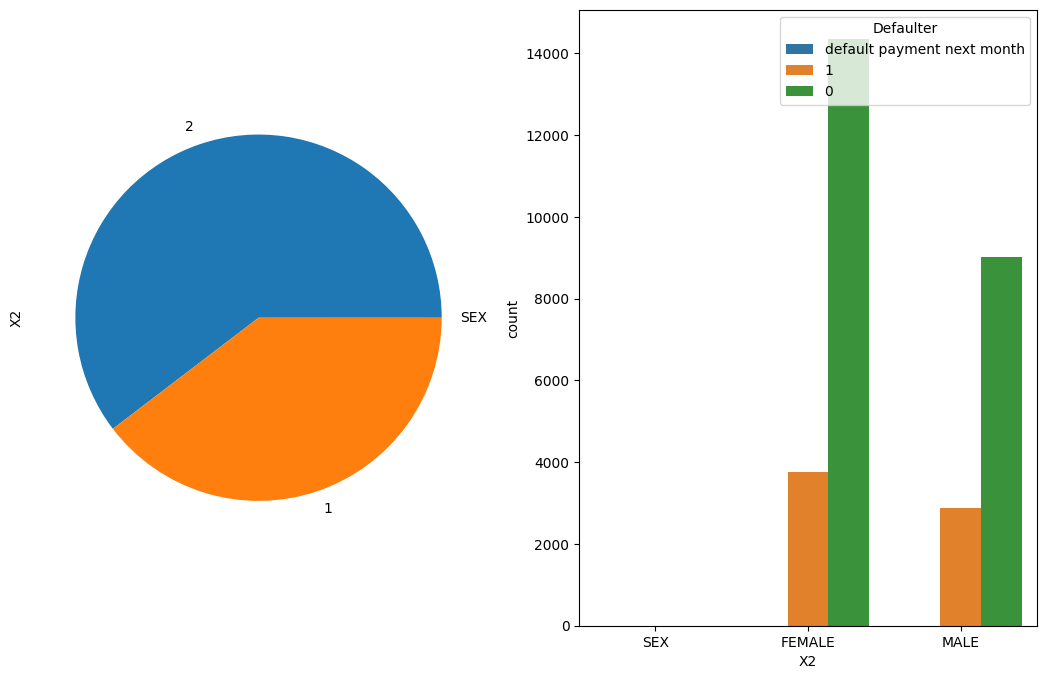

<Figure size 1000x500 with 0 Axes>

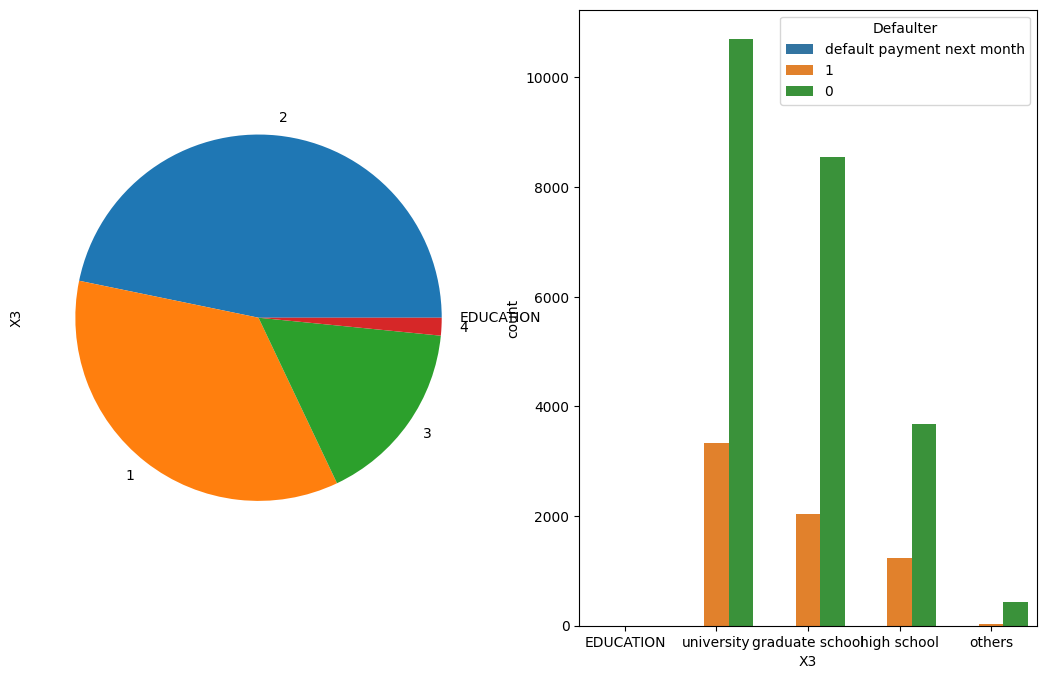

<Figure size 1000x500 with 0 Axes>

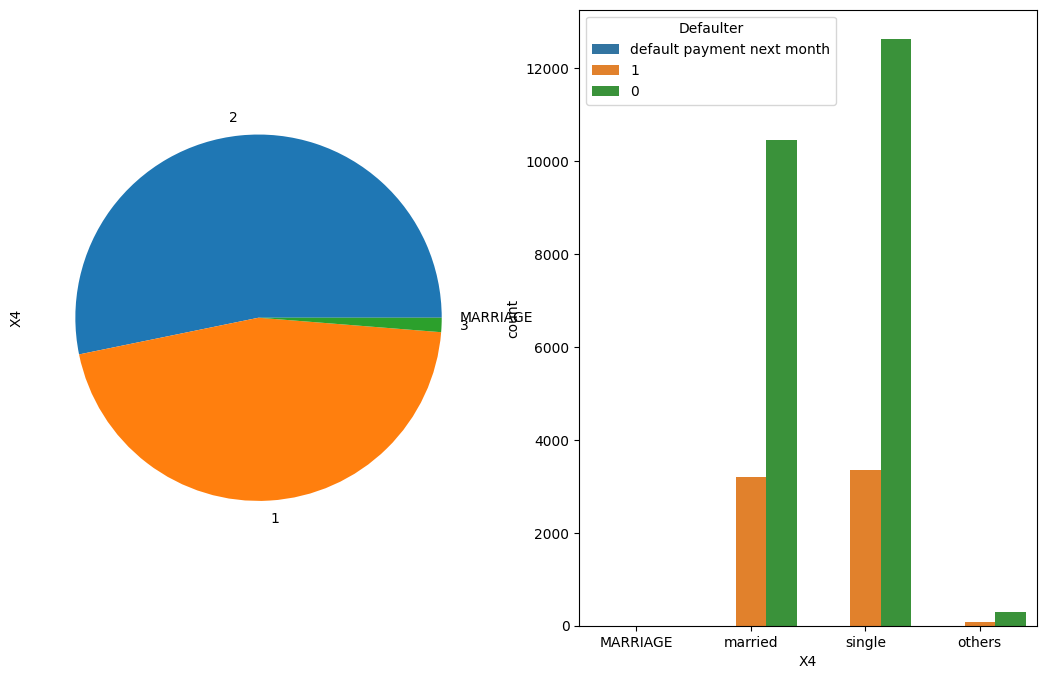

In [ ]:
#Plotting categorical features to see defaulters of credit card loans
categorical_features = ['X2', 'X3', 'X4']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['Y']
df_cat.replace({'X2': {1 : 'MALE', 2 : 'FEMALE'}, 'X3' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'X4' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [ ]:
df_fr['Payment_Value'] = df_fr['X18'] + df_fr['X19'] + df_fr['X20'] + df_fr['X21'] + df_fr['X22'] + df_fr['X23']
df_fr['Dues'] = (df_fr['X12']+df_fr['X13']+df_fr['X14']+df_fr['X15']+df_fr['X16']+df_fr['X17'])-(df_fr['X18']+df_fr['X19']+df_fr['X20']+df_fr['X21']+df_fr['X22']+df_fr['X23'])

In [ ]:
df_fr.groupby('Y')['Payment_Value'].mean()

Series([], Name: Payment_Value, dtype: float64)

In [ ]:
#ONE HOT ENCODING
df_fr = pd.get_dummies(df_fr,columns=['X3','X4'])
df_fr.head()

,A,X1,X2,X5,X6,X7,X8,X9,X10,X11,...,X18,X19,X20,X21,X22,X23,Y,Payment_Value,X3_EDUCATION,X4_MARRIAGE
0,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,1.0,2.0,3.0,4.0,5.0,6.0,isdefaulter,21.0,1,1


In [ ]:
df_fr['Payment_Value'] = df_fr['X18'] + df_fr['X19'] + df_fr['X20'] + df_fr['X21'] + df_fr['X22'] + df_fr['X23']
df_fr['Dues'] = (df_fr['X12']+df_fr['X13']+df_fr['X14']+df_fr['X15']+df_fr['X16']+df_fr['X17'])-(df_fr['X18']+df_fr['X19']+df_fr['X20']+df_fr['X21']+df_fr['X22']+df_fr['X23'])

In [ ]:
#Implementing Logistic Regression Algorithm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the data from the Excel file
file_path = '/content/default2.xls'
df_fr = pd.read_excel(file_path)

columns_of_interest = ['Payment_Value', 'Dues', 'Y']

# Create a DataFrame for logistic regression
df_logistic = df_fr[columns_of_interest]

df_logistic['Payment_Value'] = pd.to_numeric(df_logistic['Payment_Value'], errors='coerce')
df_logistic['Dues'] = pd.to_numeric(df_logistic['Dues'], errors='coerce')

# Drop rows with missing values
df_logistic = df_logistic.dropna()

# Check unique values in the 'Y' column
print("Unique values in 'Y' column:", df_logistic['Y'].unique())

# Separate features (X) and target variable (y)
X = df_logistic[['Payment_Value', 'Dues']]
y = df_logistic['Y']

# Check the data type of 'y'
print("Data type of 'y':", y.dtypes)

# Convert 'y' to numeric
y = pd.to_numeric(y, errors='coerce')

# Check the unique values in 'y' after conversion
print("Unique values in 'y' after conversion:", y.unique())

# Check the data type of 'y' again
print("Data type of 'y' after conversion:", y.dtypes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


<ipython-input-8-46228f933f14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic['Payment_Value'] = pd.to_numeric(df_logistic['Payment_Value'], errors='coerce')
<ipython-input-8-46228f933f14>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic['Dues'] = pd.to_numeric(df_logistic['Dues'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

Unique values in 'Y' column: [1 0]
Data type of 'y': object
Unique values in 'y' after conversion: [1 0]
Data type of 'y' after conversion: int64
Accuracy: 0.7787878787878788
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7710
           1       0.00      0.00      0.00      2190

    accuracy                           0.78      9900
   macro avg       0.39      0.50      0.44      9900
weighted avg       0.61      0.78      0.68      9900

Confusion Matrix:
[[7710    0]
 [2190    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Implementing Random Forest Algorithm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the Excel file
file_path = '/content/default2.xls'
df_fr = pd.read_excel(file_path)

# Assuming 'Payment_Value', 'Dues', and 'Y' are the relevant columns
columns_of_interest = ['Payment_Value', 'Dues', 'Y']

# Create a DataFrame for the Random Forest
df_rf = df_fr[columns_of_interest]

# Convert 'Payment_Value' and 'Dues' columns to numeric
df_rf['Payment_Value'] = pd.to_numeric(df_rf['Payment_Value'], errors='coerce')
df_rf['Dues'] = pd.to_numeric(df_rf['Dues'], errors='coerce')

# Convert 'Y' column to numeric
df_rf['Y'] = pd.to_numeric(df_rf['Y'], errors='coerce')

# Drop rows with missing values
df_rf = df_rf.dropna()

# Check the unique values in the 'Y' column
print("Unique values in 'Y' column:", df_rf['Y'].unique())

# Separate features (X) and target variable (y)
X = df_rf[['Payment_Value', 'Dues']]
y = df_rf['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


<ipython-input-11-50b676100a0d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf['Payment_Value'] = pd.to_numeric(df_rf['Payment_Value'], errors='coerce')
<ipython-input-11-50b676100a0d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf['Dues'] = pd.to_numeric(df_rf['Dues'], errors='coerce')
<ipython-input-11-50b676100a0d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Unique values in 'Y' column: [1. 0.]
Accuracy: 0.7428282828282828
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      7710
         1.0       0.32      0.14      0.19      2190

    accuracy                           0.74      9900
   macro avg       0.55      0.53      0.52      9900
weighted avg       0.68      0.74      0.70      9900

Confusion Matrix:
[[7048  662]
 [1884  306]]


In [ ]:
# Implementing Gradient Boosting Algorithm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the Excel file
file_path = '/content/default2.xls'
df_fr = pd.read_excel(file_path)

# Assuming 'Payment_Value', 'Dues', and 'Y' are the relevant columns
columns_of_interest = ['Payment_Value', 'Dues', 'Y']

# Create a DataFrame for Gradient Boosting
df_gbm = df_fr[columns_of_interest]

# Convert 'Payment_Value' and 'Dues' columns to numeric
df_gbm['Payment_Value'] = pd.to_numeric(df_gbm['Payment_Value'], errors='coerce')
df_gbm['Dues'] = pd.to_numeric(df_gbm['Dues'], errors='coerce')

# Convert 'Y' column to numeric
df_gbm['Y'] = pd.to_numeric(df_gbm['Y'], errors='coerce')

# Drop rows with missing values
df_gbm = df_gbm.dropna()

# Check the unique values in the 'Y' column
print("Unique values in 'Y' column:", df_gbm['Y'].unique())

# Separate features (X) and target variable (y)
X = df_gbm[['Payment_Value', 'Dues']]
y = df_gbm['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


<ipython-input-12-f9986186c00b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gbm['Payment_Value'] = pd.to_numeric(df_gbm['Payment_Value'], errors='coerce')
<ipython-input-12-f9986186c00b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gbm['Dues'] = pd.to_numeric(df_gbm['Dues'], errors='coerce')
<ipython-input-12-f9986186c00b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Unique values in 'Y' column: [1. 0.]
Accuracy: 0.781010101010101
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      7710
         1.0       0.79      0.01      0.03      2190

    accuracy                           0.78      9900
   macro avg       0.79      0.51      0.45      9900
weighted avg       0.78      0.78      0.69      9900

Confusion Matrix:
[[7702    8]
 [2160   30]]


In [ ]:
#Implementing Support Vector Machines

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data (replace 'your_file_path' with the actual file path)
file_path = '/content/default2.xls'
df_svm = pd.read_excel(file_path)

# Check unique values in the 'Y' column
print("Unique values in 'Y' column:", df_svm['Y'].unique())

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(column):
    return pd.to_numeric(column, errors='coerce')

# Assuming 'Payment_Value', 'Dues', and 'Y' are the relevant columns
features_of_interest = ['Payment_Value', 'Dues', 'Y']
df_svm[features_of_interest] = df_svm[features_of_interest].apply(clean_and_convert_to_numeric)

# Check unique values in the target variable after cleaning
print("Unique values in target variable after cleaning:", df_svm['Y'].unique())

# Drop rows with NaN values
df_svm = df_svm.dropna(subset=['Y'])

# Separate features (X) and target variable (y)
X = df_svm[['Payment_Value', 'Dues']]
y = df_svm['Y']

# Check if there are samples in X before preprocessing
if X.shape[0] == 0:
    raise ValueError("No samples found in X. Check your data.")

# Reshape X to have a shape of (n_samples, n_features)
X = X.values.reshape(-1, 2)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

# Create a Support Vector Machine (SVM) model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Unique values in 'Y' column: ['isdefaulter' 1 0]
Unique values in target variable after cleaning: [nan  1.  0.]
Accuracy: 0.7787878787878788
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      7710
         1.0       0.00      0.00      0.00      2190

    accuracy                           0.78      9900
   macro avg       0.39      0.50      0.44      9900
weighted avg       0.61      0.78      0.68      9900

Confusion Matrix:
[[7710    0]
 [2190    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Implementing Neural Network Machines

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data (replace 'your_file_path' with the actual file path)
file_path = '/content/default2.xls'
df_nn = pd.read_excel(file_path)

# Check unique values in the 'Y' column
print("Unique values in 'Y' column:", df_nn['Y'].unique())

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(column):
    return pd.to_numeric(column, errors='coerce')

# Assuming 'Payment_Value', 'Dues', and 'Y' are the relevant columns
features_of_interest = ['Payment_Value', 'Dues', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
df_nn[features_of_interest] = df_nn[features_of_interest].apply(clean_and_convert_to_numeric)

# Check unique values in the target variable after cleaning
print("Unique values in target variable after cleaning:", df_nn['Y'].unique())

# Create a binary target variable for classification
df_nn['Target'] = df_nn['Y'].apply(lambda x: 1 if x == 'isdefaulter' else int(x))

# Drop rows with NaN values
df_nn = df_nn.dropna(subset=['Target'])

# Separate features (X) and target variable (y)
X = df_nn[['Payment_Value', 'Dues', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']]
y = df_nn['Target']

# Check if there are samples in X before preprocessing
if X.shape[0] == 0:
    raise ValueError("No samples found in X. Check your data.")

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Unique values in 'Y' column: ['isdefaulter' 1 0]
Unique values in target variable after cleaning: ['isdefaulter' 1 0]
Epoch 1/10
503/503 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.7749 - val_loss: nan - val_accuracy: 0.7704
Epoch 2/10
503/503 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.7808 - val_loss: nan - val_accuracy: 0.7704
Epoch 3/10
503/503 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.7808 - val_loss: nan - val_accuracy: 0.7704
Epoch 4/10
503/503 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7808 - val_loss: nan - val_accuracy: 0.7704
Epoch 5/10
503/503 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7808 - val_loss: nan - val_accuracy: 0.7704
Epoch 6/10
503/503 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7808 - val_loss: nan - val_accuracy: 0.7704
Epoch 7/10
503/503 [==============================] - 1s 3ms/step 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


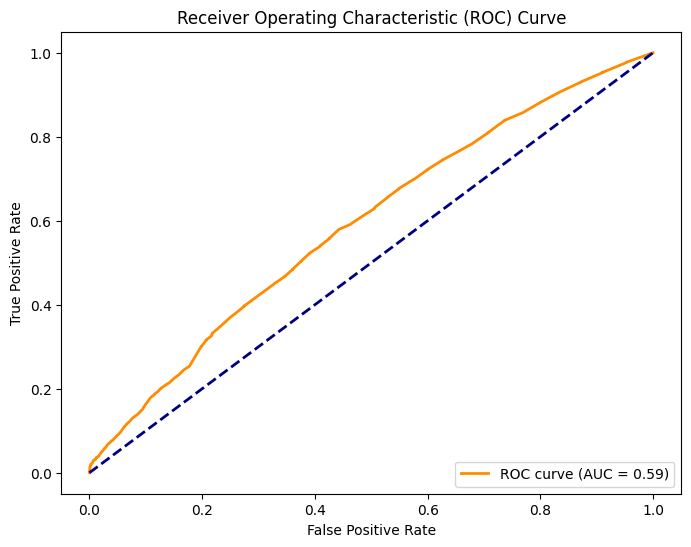

In [40]:
#Implementing ROC AUC for Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load your data (replace 'your_file_path' with the actual file path)
file_path = '/content/default2.xls'
df = pd.read_excel(file_path)

# Assuming 'Payment_Value', 'Dues', and 'Y' are the relevant columns
columns_of_interest = ['Payment_Value', 'Dues', 'Y']
df = df[columns_of_interest]

# Convert 'Payment_Value' and 'Dues' columns to numeric
df['Payment_Value'] = pd.to_numeric(df['Payment_Value'], errors='coerce')
df['Dues'] = pd.to_numeric(df['Dues'], errors='coerce')

# Convert 'Y' column to numeric
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df[['Payment_Value', 'Dues']]
y = df['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




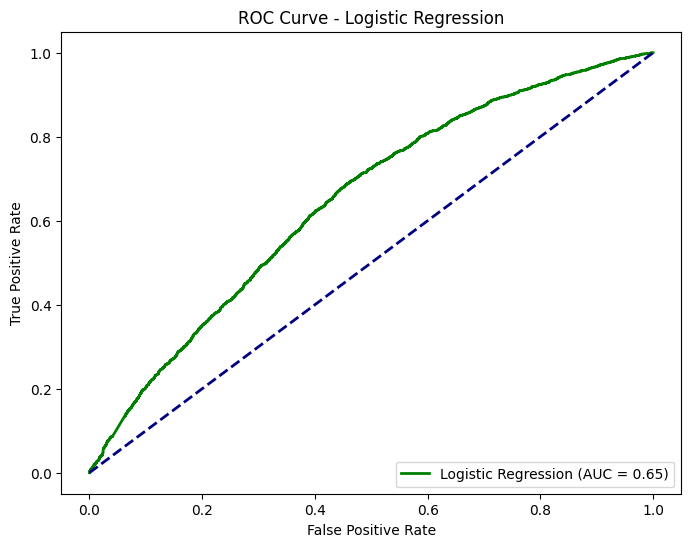

In [41]:
#Implementing ROC AUC for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


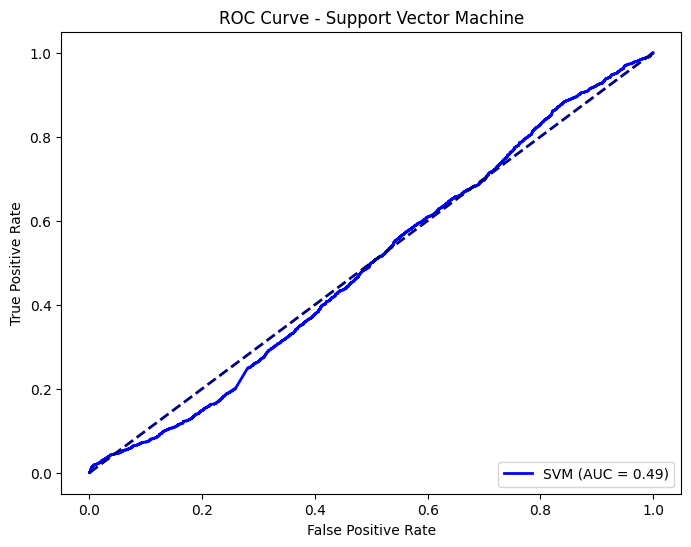

In [42]:
#Implementing ROC AUC for Support Vector Machine
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()


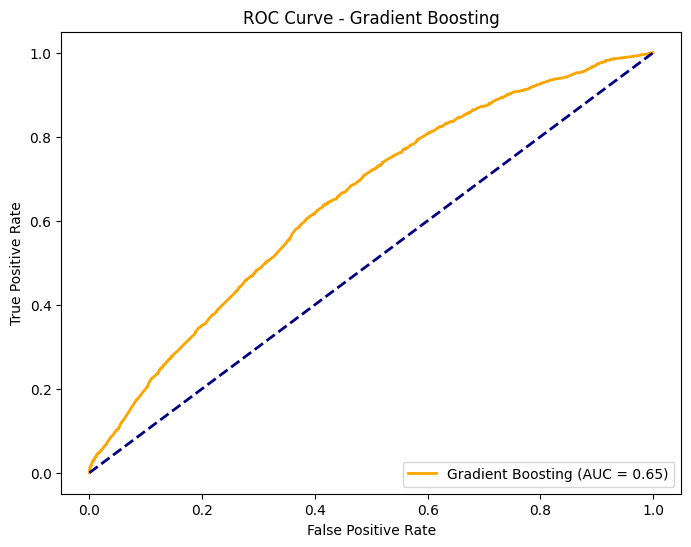

In [43]:
# Implementing Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


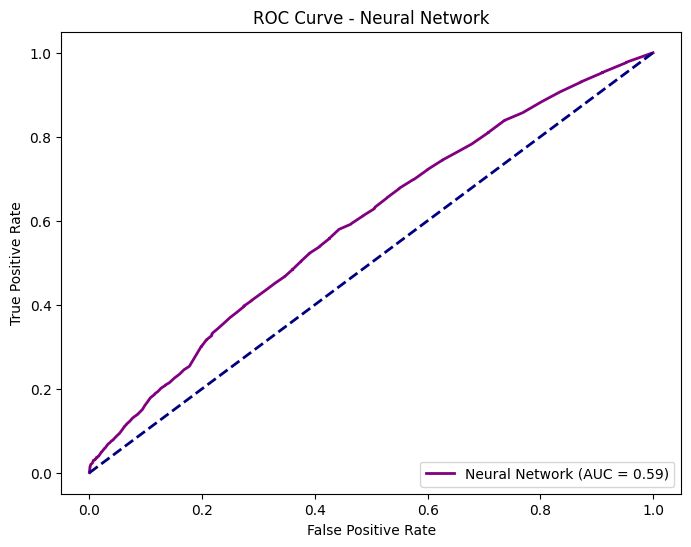

In [44]:
# Implementing for Neural Network

# Calculate ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve for Neural Network
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label='Neural Network (AUC = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()
